<a href="https://colab.research.google.com/github/seon0415/weit/blob/main/%E2%98%85%EC%B7%A8%ED%95%A92_%ED%9E%88%ED%8A%B8%EB%A7%B5%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams.update({'font.family': 'Malgun Gothic',   #한글 폰트
                     'figure.dpi': '120',              #해상도
                     'figure.figsize': [6.5, 6]})      #가로 세로 크기   
                     
data=pd.read_csv('취합(성범죄수 포함).csv')
data.drop(columns='자치구별',inplace=True)

In [75]:
data.rename(columns={'면적당 cctv':'cctv',
                     '평균 가구원수':'furn_av',
                     '1인가구':'furn_one',
                     '면적당 경제수준':'economy',
                     '면적당 순찰차':'police_car',
                     '면적당 경찰서,소방관 수':'police_office',
                     '면적당 지역경찰 수':'police_officer',
                     '면적 구성비':'ground',
                     '면적당 성범죄 수':'crime'},inplace=True)

In [ ]:
#df=pd.read_csv('취합.csv')
#crime=pd.DataFrame(
#    {'자치구별':['중랑구','강남구','마포구','광진구','동대문구','영등포구','동작구','관악구','금천구','구로구'],
#     '면적당 성범죄 수':[16.164,14.632,13.459,12.192,11.884,11.364,11.009,10.855,10.291,9.045]})
#data=pd.merge(df,crime,on='자치구별')

In [76]:
data_cor=data.corr()
data_cor=round(data_cor, 2) 
data_cor

,cctv,furn_av,furn_one,economy,apartment,police_car,police_office,police_officer,ground,crime
cctv,1.00,0.43,-0.51,0.01,-0.29,0.19,0.34,0.32,-0.39,0.01
furn_av,0.43,1.00,-0.77,0.44,0.37,-0.18,0.17,-0.02,0.01,0.20
furn_one,-0.51,-0.77,1.00,-0.36,0.03,-0.22,-0.42,-0.32,0.50,-0.07
economy,0.01,0.44,-0.36,1.00,0.58,-0.45,-0.27,-0.43,0.43,0.09
apartment,-0.29,0.37,0.03,0.58,1.00,-0.43,-0.46,-0.64,0.73,0.38
police_car,0.19,-0.18,-0.22,-0.45,-0.43,1.00,0.83,0.87,-0.77,-0.21
police_office,0.34,0.17,-0.42,-0.27,-0.46,0.83,1.00,0.97,-0.73,-0.21
police_officer,0.32,-0.02,-0.32,-0.43,-0.64,0.87,0.97,1.00,-0.84,-0.28
ground,-0.39,0.01,0.50,0.43,0.73,-0.77,-0.73,-0.84,1.00,0.35
crime,0.01,0.20,-0.07,0.09,0.38,-0.21,-0.21,-0.28,0.35,1.00


<Axes: >

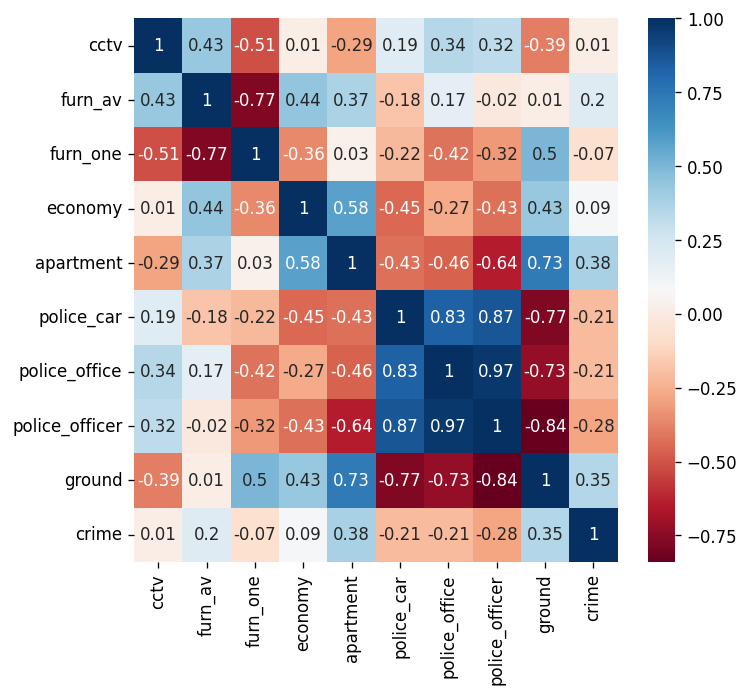

In [77]:
sns.heatmap(data_cor, 
            annot=True,     #상관계수 표시
            cmap= 'RdBu')   #컬러맵

#1에 가까울수록 관련성큼
#양수면 정비례, 음수면 반비례

<Axes: >

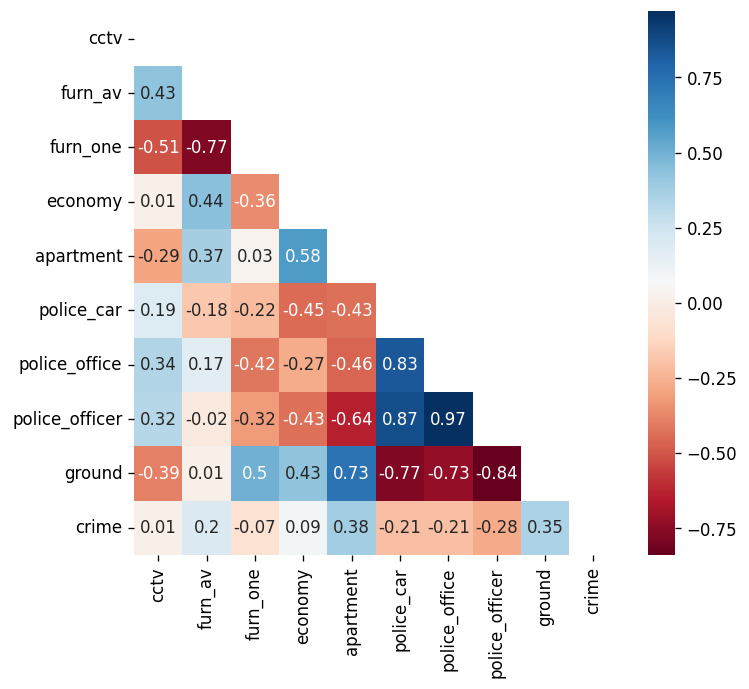

In [78]:
import numpy as np
mask=np.zeros_like(data_cor)

#오른쪽 위 대각행렬을 1로 바꾸기
mask[np.triu_indices_from(mask)]=1

#히트맵에 mask 적용하기
sns.heatmap(data=data_cor,
            annot=True,
            cmap='RdBu',
            mask=mask)
